In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import scipy
from scipy import stats
import seaborn as sns
import pickle as pkl

# Carga de datos
Precio
Baños
Habitaciones
M2
Barrio

In [62]:
# Carga de datos
precio = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
baños = np.genfromtxt("idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
habitaciones = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
m2 = np.genfromtxt("idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
barrio = np.genfromtxt("idealista_madrid.csv", usecols=(4), delimiter=",", skip_header=1, encoding="utf-8", dtype=str)

In [63]:
## Media y mediana
print(f"Precio medio: {round(np.mean(precio), 2)}") 
print(f"Media de baños: {round(np.mean(baños), 2)}") 
print(f"Media de habitaciones: {round(np.mean(habitaciones), 2)}") 
print(f"Media de metros2: {round(np.mean(m2), 2)}") 
print("\n")
print(f"Mediana del precio: {(np.median(precio))}")
print(f"Mediana de baños: {(np.median(baños))}") 
print(f"Mediana de habitaciones: {(np.median(habitaciones))}")
print(f"Mediana de metros2: {(np.median(m2))}") 


Precio medio: 1290575.26
Media de baños: 2.9
Media de habitaciones: 3.47
Media de metros2: 217.24


Mediana del precio: 990000.0
Mediana de baños: 3.0
Mediana de habitaciones: 3.0
Mediana de metros2: 158.0


In [64]:
## Máximo y mínimo
print(f"El piso más caro vale {(np.max(precio))} €")
print(f"El piso más barato vale {(np.min(precio))} €")
print(f"El piso con más baños, tiene {(np.max(baños))} baños ")
print(f"El piso con menos baños, tiene {(np.min(baños))} baño")
print(f"El piso con más habitaciones, tiene {(np.max(habitaciones))} habitaciones")
print(f"El piso que menos habitaciones, tiene {(np.min(habitaciones))} habitaciones")
print(f"El piso más grande tiene {(np.max(m2))} m2 ")
print(f"El piso más pequeño tiene {(np.min(m2))} m2 ")


El piso más caro vale 8900000 €
El piso más barato vale 122000 €
El piso con más baños, tiene 12 baños 
El piso con menos baños, tiene 1 baño
El piso con más habitaciones, tiene 12 habitaciones
El piso que menos habitaciones, tiene 0 habitaciones
El piso más grande tiene 1768 m2 
El piso más pequeño tiene 14 m2 


In [65]:
## Histograma y curva de densidad

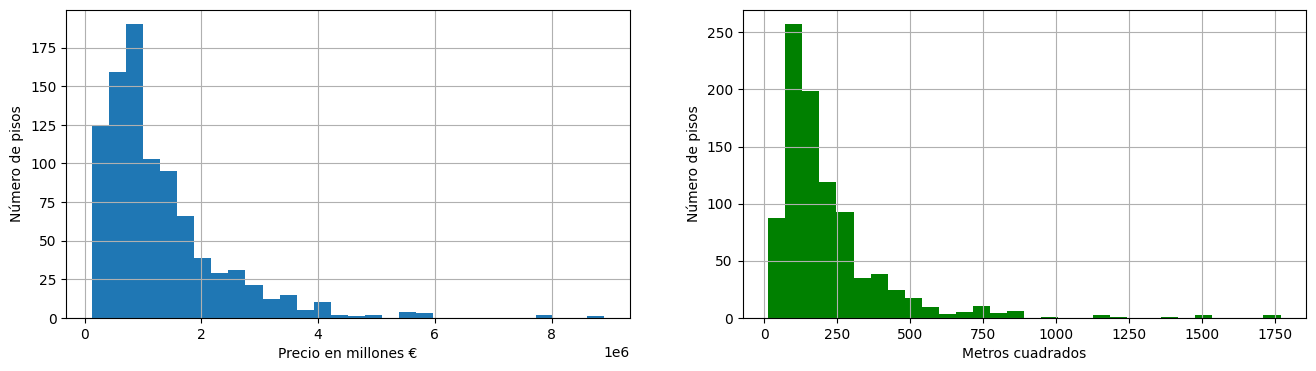

In [66]:
# Histograma precio y m2
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) # Precio
plt.hist(precio, bins=30)
plt.xlabel("Precio en millones €")
plt.ylabel("Número de pisos")
plt.grid()

plt.subplot(1, 2, 2) # Metros
plt.hist(m2, bins=30, color="green")
plt.xlabel("Metros cuadrados")
plt.ylabel("Número de pisos")
plt.grid()

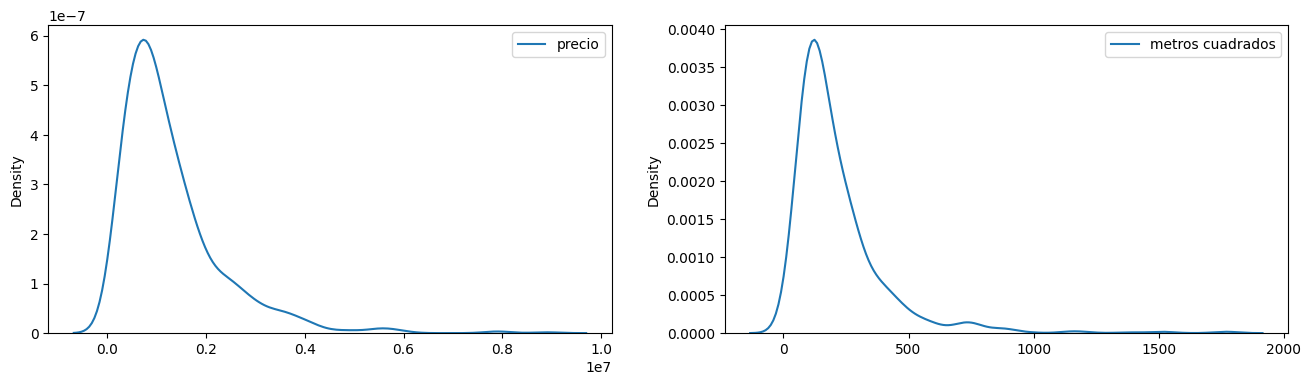

In [67]:
# Densidad precio y m2
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) # Primer gráfico
sns.kdeplot(precio, label= "precio")
plt.legend();

plt.subplot(1, 2, 2) # Primer gráfico
sns.kdeplot(m2, label= "metros cuadrados")
plt.legend();

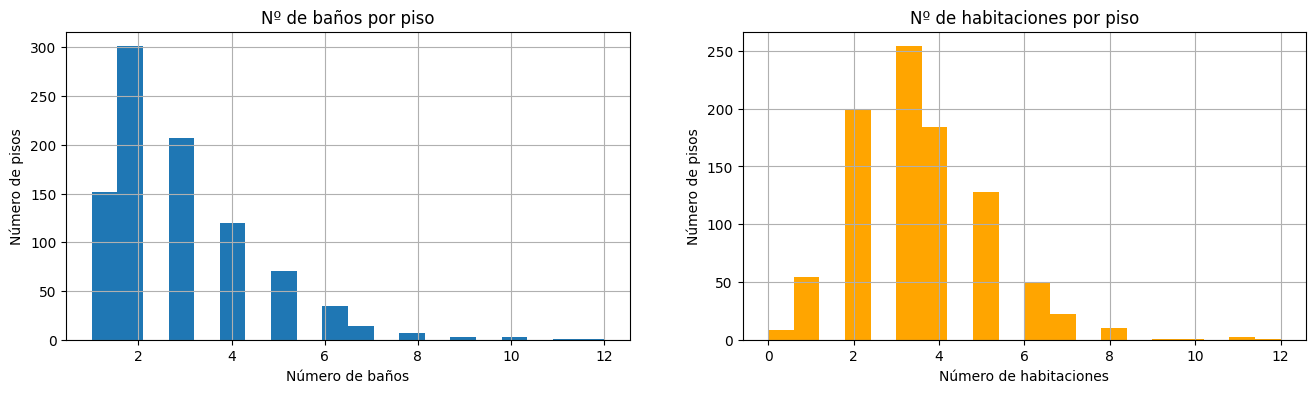

In [68]:
# Baños y habitaciones
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) # Baños
plt.hist(baños, bins=20)
plt.title("Nº de baños por piso")
plt.xlabel("Número de baños")
plt.ylabel("Número de pisos")
plt.grid()

plt.subplot(1, 2, 2) # Habitaciones
plt.hist(habitaciones, bins=20, color="orange")
plt.title("Nº de habitaciones por piso")
plt.xlabel("Número de habitaciones")
plt.ylabel("Número de pisos")
plt.grid()

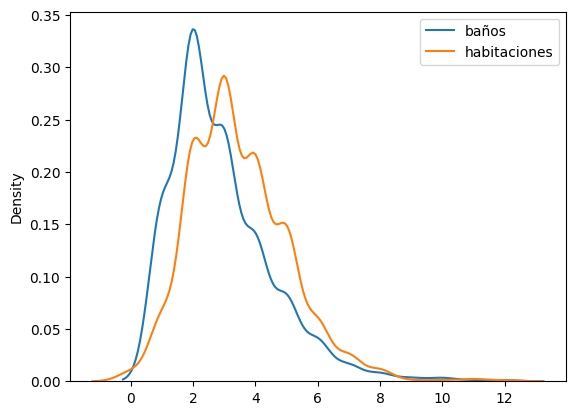

In [69]:
# Densidad baños y habitaciones
sns.kdeplot(baños, label= "baños")
sns.kdeplot(habitaciones, label= "habitaciones")
plt.legend();

In [70]:
## Cuartiles: Q1, Q2, Q3

In [71]:
Q_precio= np.quantile(a = precio, q = [0.25, 0.50, 0.75], interpolation = "lower")
Q_baños= np.quantile(a = baños, q = [0.25, 0.50, 0.75], interpolation = "lower")
Q_habitaciones= np.quantile(a = habitaciones, q = [0.25, 0.50, 0.75], interpolation = "lower")
Q_metros= np.quantile(a = m2, q = [0.25, 0.50, 0.75], interpolation = "lower")
print(f"El 25% de los pisos vale menos de {Q_precio[0]} €, tiene {Q_baños[0]} baños, {Q_habitaciones[0]} habitaciones y {Q_metros[0]} m2.")
print(f"El 50% de los pisos vale menos de {Q_precio[1]} €, tiene {Q_baños[1]} baños, {Q_habitaciones[1]} habitaciones y {Q_metros[1]} m2.")
print(f"El 75% de los pisos vale menos de {Q_precio[2]} €, tiene {Q_baños[2]} baños, {Q_habitaciones[2]} habitaciones y {Q_metros[2]} m2.")



El 25% de los pisos vale menos de 625000 €, tiene 2 baños, 2 habitaciones y 104 m2.
El 50% de los pisos vale menos de 990000 €, tiene 3 baños, 3 habitaciones y 158 m2.
El 75% de los pisos vale menos de 1650000 €, tiene 4 baños, 4 habitaciones y 264 m2.


In [72]:
## IQR = Rango intercuartil
IQR_precio = Q_precio[2] - Q_precio[0]
print(IQR_precio)

IQR_baños = Q_baños[2] - Q_baños[0]
print(IQR_baños)

IQR_habitaciones = Q_habitaciones[2] - Q_habitaciones[0]
print(IQR_habitaciones)

IQR_metros = Q_metros[2] - Q_metros[0]
print(IQR_metros)

1025000
2
2
160


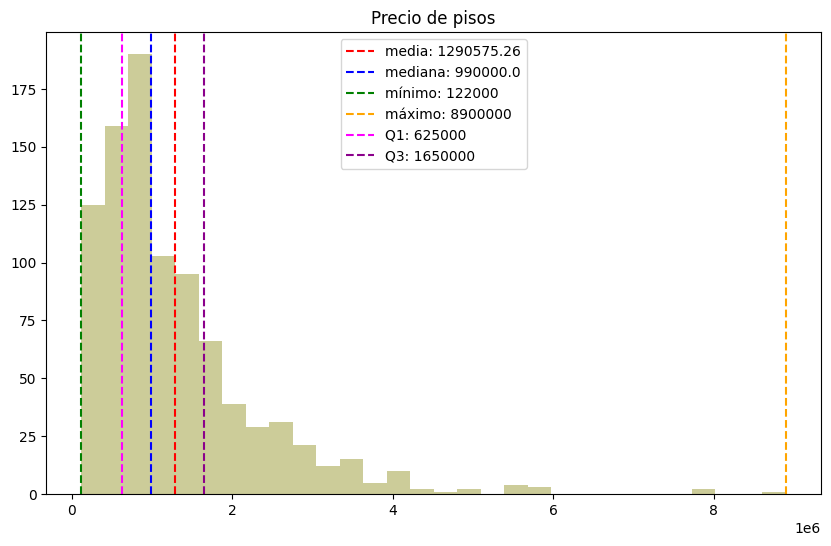

In [139]:
precio_medio = np.mean(precio)
precio_mediana = np.median(precio)
precio_minimo = np.min(precio)
precio_maximo = np.max (precio)


plt.figure(figsize=(10, 6))
plt.hist(precio, bins=30, color='olive', alpha=0.4)
plt.title("Precio de pisos")
plt.axvline(precio_medio, color='red', linestyle='dashed', label=f'media: {precio_medio:.2f}')
plt.axvline(precio_mediana, color='blue', linestyle='dashed', label=f'mediana: {precio_mediana}')
plt.axvline(precio_minimo, color='green', linestyle='dashed', label=f'mínimo: {precio_minimo}')
plt.axvline(precio_maximo, color='orange', linestyle='dashed', label=f'máximo: {precio_maximo}')
plt.axvline(Q_precio[0], color='magenta', linestyle='dashed', label=f'Q1: {Q_precio[0]}')
plt.axvline(Q_precio[2], color='darkmagenta', linestyle='dashed', label=f'Q3: {Q_precio[2]}')
plt.legend(loc=0);

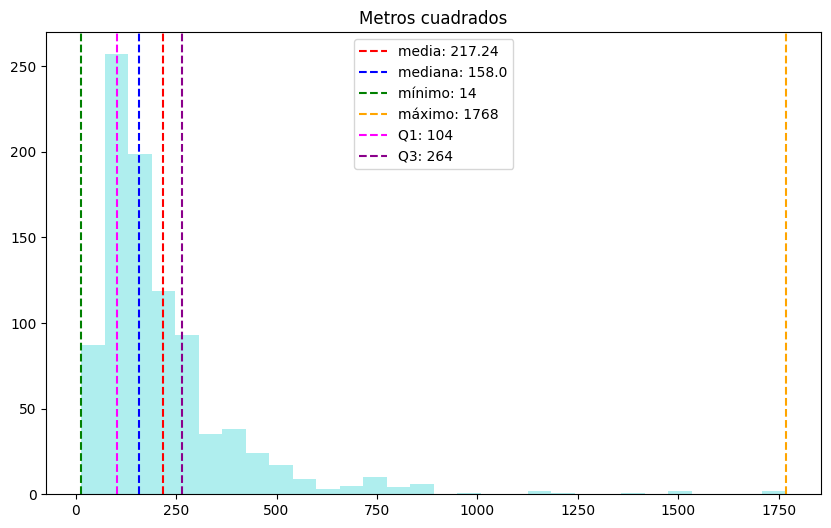

In [155]:
metros_media = np.mean(m2)
metros_mediana = np.median(m2)
metros_minimo = np.min(m2)
metros_maximo = np.max (m2)


plt.figure(figsize=(10, 6))
plt.hist(m2, bins=30, color='paleturquoise', alpha=1)
plt.title("Metros cuadrados")
plt.axvline(metros_media, color='red', linestyle='dashed', label=f'media: {metros_media:.2f}')
plt.axvline(metros_mediana, color='blue', linestyle='dashed', label=f'mediana: {metros_mediana}')
plt.axvline(metros_minimo, color='green', linestyle='dashed', label=f'mínimo: {metros_minimo}')
plt.axvline(metros_maximo, color='orange', linestyle='dashed', label=f'máximo: {metros_maximo}')
plt.axvline(Q_metros[0], color='magenta', linestyle='dashed', label=f'Q1: {Q_metros[0]}')
plt.axvline(Q_metros[2], color='darkmagenta', linestyle='dashed', label=f'Q3: {Q_metros[2]}')
plt.legend(loc=0);

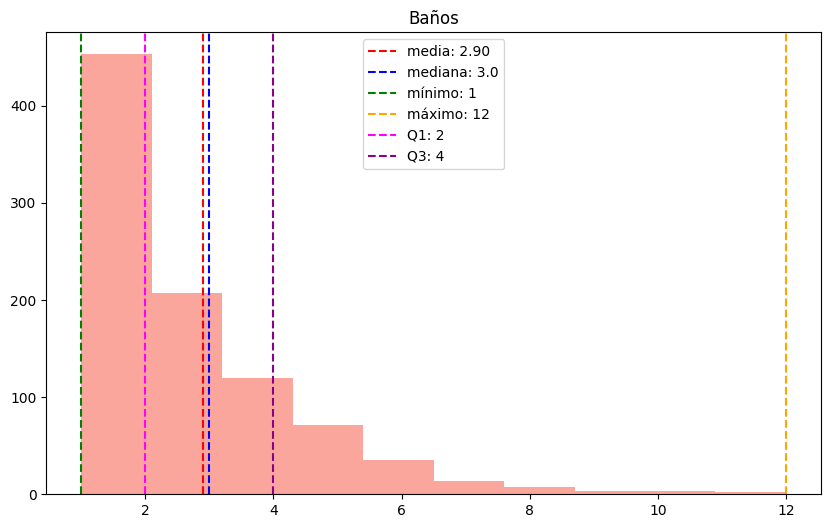

In [152]:
baños_media = np.mean(baños)
baños_mediana = np.median(baños)
baños_minimo = np.min(baños)
baños_maximo = np.max (baños)

plt.figure(figsize=(10, 6))
plt.hist(baños, bins=10, color='salmon', alpha=0.7)
plt.title("Baños")
plt.axvline(baños_media, color='red', linestyle='dashed', label=f'media: {baños_media:.2f}')
plt.axvline(baños_mediana, color='blue', linestyle='dashed', label=f'mediana: {baños_mediana}')
plt.axvline(baños_minimo, color='green', linestyle='dashed', label=f'mínimo: {baños_minimo}')
plt.axvline(baños_maximo, color='orange', linestyle='dashed', label=f'máximo: {baños_maximo}')
plt.axvline(Q_baños[0], color='magenta', linestyle='dashed', label=f'Q1: {Q_baños[0]}')
plt.axvline(Q_baños[2], color='darkmagenta', linestyle='dashed', label=f'Q3: {Q_baños[2]}')
plt.legend(loc=0);

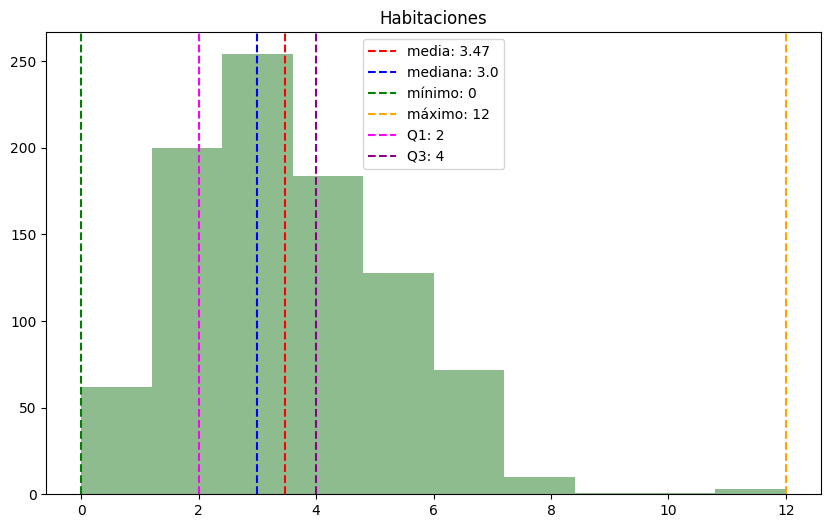

In [153]:
habitaciones_media = np.mean(habitaciones)
habitaciones_mediana = np.median(habitaciones)
habitaciones_minimo = np.min(habitaciones)
habitaciones_maximo = np.max (habitaciones)


plt.figure(figsize=(10, 6))
plt.hist(habitaciones, bins=10, color='darkseagreen', alpha=1)
plt.title("Habitaciones")
plt.axvline(habitaciones_media, color='red', linestyle='dashed', label=f'media: {habitaciones_media:.2f}')
plt.axvline(habitaciones_mediana, color='blue', linestyle='dashed', label=f'mediana: {habitaciones_mediana}')
plt.axvline(habitaciones_minimo, color='green', linestyle='dashed', label=f'mínimo: {habitaciones_minimo}')
plt.axvline(habitaciones_maximo, color='orange', linestyle='dashed', label=f'máximo: {habitaciones_maximo}')
plt.axvline(Q_habitaciones[0], color='magenta', linestyle='dashed', label=f'Q1: {Q_habitaciones[0]}')
plt.axvline(Q_habitaciones[2], color='darkmagenta', linestyle='dashed', label=f'Q3: {Q_habitaciones[2]}')
plt.legend(loc=0);

In [74]:
## Filtrar 20 % más caro, y el 20 % más barato
# Opcional: filtrar los barrios 20 % más baratos

In [75]:
percentil_20 = np.percentile(precio,20)
percentil_80 = np.percentile(precio,80)

Pisos_mas_caros = precio[precio >= percentil_80]
Pisos_mas_baratos = precio[precio <= percentil_20]

Barrios_mas_baratos= barrio[precio <= percentil_20]
Barrios_mas_caros= barrio[precio >= percentil_80]

Pisos_mas_caros.shape
Pisos_mas_baratos.shape


print(f"El 20% más caro, son {Pisos_mas_caros.shape} pisos y tiene un precio medio de {round(np.mean(Pisos_mas_caros), 2)}€")
print(f"El 20% más barato, son {Pisos_mas_baratos.shape} pisos y tiene un precio medio de {round(np.mean(Pisos_mas_baratos), 2)}€")

print("Barrios en el 20% más barato son:", np.unique(Barrios_mas_baratos))

print("Barrios en el 20% más caro son:", np.unique(Barrios_mas_caros))

El 20% más caro, son (185,) pisos y tiene un precio medio de 2915162.16€
El 20% más barato, son (184,) pisos y tiene un precio medio de 350706.89€
Barrios en el 20% más barato son: ['12 de Octubre-Orcasur' 'Acacias' 'Almendrales' 'Amposta' 'Arapiles'
 'Argüelles' 'Barajas' 'Bellas Vistas' 'Berruguete' 'Buena Vista'
 'Butarque' 'Campamento' 'Canillas' 'Casco Histórico de Barajas'
 'Castellana' 'Castilla' 'Centro' 'Chamartín' 'Chamberí' 'Chopera'
 'Chueca-Justicia' 'Ciudad Jardín' 'Ciudad Lineal' 'Ciudad Universitaria'
 'Colina' 'Comillas' 'Concepción' 'Conde Orgaz-Piovera' 'Costillares'
 'Cuatro Caminos' 'Cuzco-Castillejos' 'Ensanche de Vallecas - La Gavia'
 'Estrella' 'Fuencarral' 'Fuente del Berro' 'Gaztambide' 'Goya'
 'Guindalera' 'Hortaleza' 'Huertas-Cortes' 'Imperial' 'La Paz' 'Latina'
 'Lavapiés-Embajadores' 'Los Ángeles' 'Malasaña-Universidad' 'Moncloa'
 'Moratalaz' 'Opañel' 'Pacífico' 'Palacio' 'Palomas' 'Palos de Moguer'
 'Pau de Carabanchel' 'Peñagrande' 'Pinar del Rey' 'Prosp

In [76]:
## Moda: calcular moda también de address. Opcional: Moda de los barrios más baratos y más caros

In [77]:
from collections import Counter
contador = Counter(barrio)
contador.items()
moda_barrio = contador.most_common(10)
moda_barrio

[(np.str_('Barrio de Salamanca'), 63),
 (np.str_('Hortaleza'), 60),
 (np.str_('Chamartín'), 54),
 (np.str_('Moncloa'), 48),
 (np.str_('Centro'), 47),
 (np.str_('Fuencarral'), 35),
 (np.str_('Chamberí'), 34),
 (np.str_('Malasaña-Universidad'), 25),
 (np.str_('Goya'), 22),
 (np.str_('Lista'), 22)]

In [78]:
top10_barrios, conteos = zip(*moda_barrio)
print(top10_barrios)
print(conteos)

(np.str_('Barrio de Salamanca'), np.str_('Hortaleza'), np.str_('Chamartín'), np.str_('Moncloa'), np.str_('Centro'), np.str_('Fuencarral'), np.str_('Chamberí'), np.str_('Malasaña-Universidad'), np.str_('Goya'), np.str_('Lista'))
(63, 60, 54, 48, 47, 35, 34, 25, 22, 22)


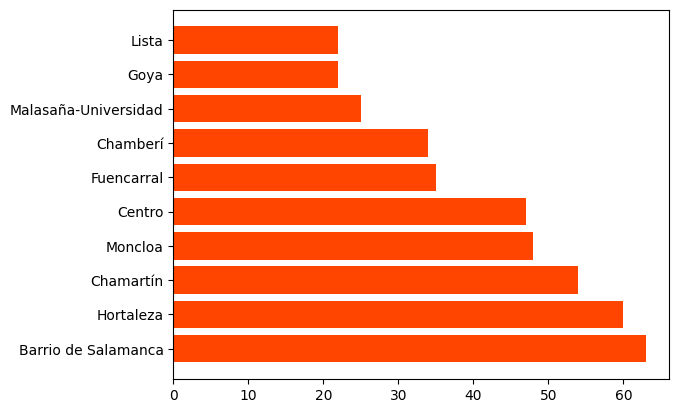

In [79]:
plt.barh(top10_barrios, conteos, color= "orangered")
plt.show()

In [80]:
moda_precio = stats.mode(precio)
moda_baños = stats.mode(baños)
moda_habitaciones = stats.mode(habitaciones)
moda_metros = stats.mode(m2)


print(f"El precio que más se repite es {moda_precio[0]} € con {moda_precio[1]} veces")
print(f"El nº de baños que más se repite son {moda_baños[0]} baños con {moda_baños[1]} veces")
print(f"El nº de habitaciones que más se repite {moda_habitaciones[0]} habitaciones con {moda_habitaciones[1]} veces")
print(f"El nº de metros que más se repite es {moda_metros[0]} m2 con {moda_metros[1]} veces")

El precio que más se repite es 850000 € con 15 veces
El nº de baños que más se repite son 2 baños con 301 veces
El nº de habitaciones que más se repite 3 habitaciones con 254 veces
El nº de metros que más se repite es 133 m2 con 12 veces


In [81]:
contador1 = Counter(Barrios_mas_baratos)
contador1.items()
moda_barrios_baratos = contador1.most_common(1)
print(moda_barrios_baratos)


contador2 = Counter(Barrios_mas_caros)
contador2.items()
moda_barrios_caros = contador2.most_common(1)
print(moda_barrios_caros)

print(f"La moda de los barrios más caros es Hortaleza con 21 pisos")
print(f"La moda de los barrios más baratos es Lavapiés-Embajadores con 12 pisos")

[(np.str_('Lavapiés-Embajadores'), 12)]
[(np.str_('Hortaleza'), 21)]
La moda de los barrios más caros es Hortaleza con 21 pisos
La moda de los barrios más baratos es Lavapiés-Embajadores con 12 pisos


In [82]:
## Dispersión: varianza y desviación estándar

In [83]:
print(f"Varianza del precio: {round(np.var(precio), 2)}") 
print(f"Varianza de baños: {round(np.var(baños), 2)}") 
print(f"Varianza de habitaciones: {round(np.var(habitaciones), 2)}") 
print(f"Varianza de metros: {round(np.var(m2), 2)}") 

Varianza del precio: 1073448095137.26
Varianza de baños: 2.64
Varianza de habitaciones: 2.54
Varianza de metros: 36726.28


In [84]:
print(f"Desviación del precio: {round(np.std(precio), 2)}") 
print(f"Desviación de baños: {round(np.std(baños), 2)}") 
print(f"Desviación de habitaciones: {round(np.std(habitaciones), 2)}") 
print(f"Desviación de metros: {round(np.std(m2), 2)}") 

Desviación del precio: 1036073.4
Desviación de baños: 1.63
Desviación de habitaciones: 1.59
Desviación de metros: 191.64


In [85]:
## Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.

In [86]:
# Outliers con la valla de Tukey
def outliers_tukey(array, k=1.5):
    q1 = np.percentile(array, 25)
    q3 = np.percentile(array, 75)
    iqr = q3 - q1
    lim_l = q1 - k*iqr
    lim_r= q3 + k*iqr
    outliers = [elem for elem in array if elem < lim_l or elem > lim_r]
    normal_data = [elem for elem in array if elem not in outliers]
    return np.array(normal_data), np.array(outliers)
    

In [87]:
normal_data, outliers = outliers_tukey(precio)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 860
Total de outliers: 55
[5700000 3950000 3900000 4950000 7900000 5500000 3500000 3550000 3200000
 3500000 3500000 4300000 5500000 3600000 3900000 5000000 3700000 3600000
 3600000 5900000 4200000 3600000 3500000 3950000 5500000 4200000 8900000
 3465000 3700000 3700000 3490000 3950000 3200000 3200000 3250000 5900000
 3200000 3950000 3195000 3950000 3200000 3600000 4500000 3500000 4200000
 5500000 3500000 4750000 3500000 3195000 4000000 3250000 3300000 3950000
 7900000]


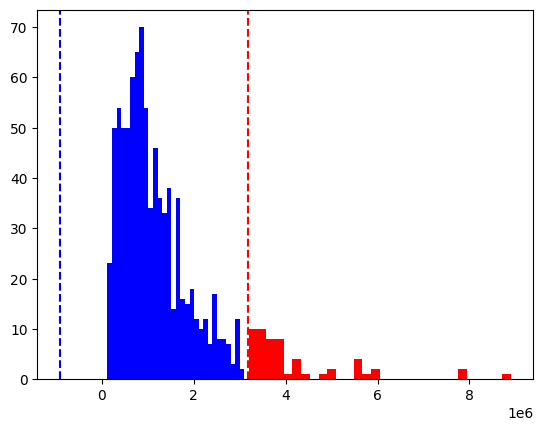

In [88]:
normal_data, outliers = outliers_tukey(precio)

q1 = np.quantile(precio, 0.25)
q3 = np.quantile(precio, 0.75)
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 1.5*ric

# No-Outliers
plt.hist(normal_data, bins = 30, color = "blue")

# Outliers
plt.hist(outliers, bins = 30, color = "red")

# Q1 - 1.5*ric
plt.axvline(lim_l, color = "blue", linestyle = "--")

# Q3 + 1.5*ric
plt.axvline(lim_r, color = "red", linestyle = "--")

plt.show()

In [89]:
# Outliers con Z-Score

def outliers_z_score(array, z = 3):
    mean = np.mean(array)
    std = np.std(array)
    
    lim_l = mean - z*std
    lim_r = mean + z*std
    
    outliers = [elem for elem in array if elem < lim_l or elem > lim_r]  
    normal_data = [elem for elem in array if elem not in outliers]
    
    return np.array(normal_data), np.array(outliers)

In [90]:
normal_data, outliers = outliers_z_score(precio)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 901
Total de outliers: 14
[5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


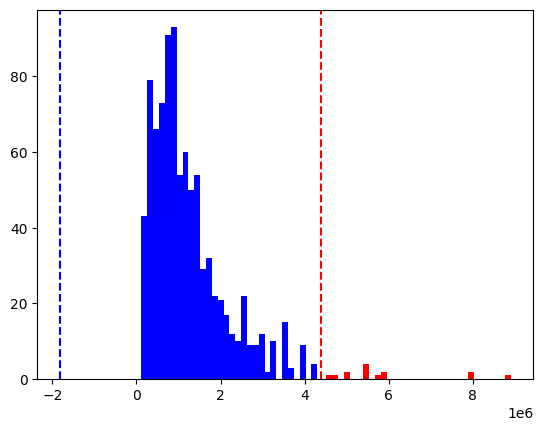

In [91]:
normal_data, outliers = outliers_z_score(precio)
mean = np.mean(precio)
std = np.std(precio)

# Limites laterales
lim_l = mean - 3*std
lim_r = mean + 3*std

# No-Outliers
plt.hist(normal_data, bins = 30, color = "blue")

# Outliers
plt.hist(outliers, bins = 30, color = "red")

# 𝜇 ± 3𝜎
plt.axvline(lim_l, color = "blue", linestyle = "--")
plt.axvline(lim_r, color = "red", linestyle = "--")

plt.show()

In [92]:
## Correlación: calcular la matriz y pintarla con matplotlib/seaborn

In [93]:
print(stats.pearsonr(precio, precio)[0])
print(stats.pearsonr(precio, baños)[0])
print(stats.pearsonr(precio, habitaciones)[0])
print(stats.pearsonr(precio, m2)[0])
print(f"La correlación entre el precio y los metros cuadrados de los pisos es: {round(stats.pearsonr(precio, m2)[0], 2)}, positiva y alta")


1.0
0.6916252947603247
0.5571893208650728
0.681762407588213
La correlación entre el precio y los metros cuadrados de los pisos es: 0.68, positiva y alta


In [94]:
columnas= [precio, baños, habitaciones, m2]
matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
                                           
    matriz_lista.append(fila)
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.69162529 0.55718932 0.68176241]
 [0.69162529 1.         0.77076481 0.81873292]
 [0.55718932 0.77076481 1.         0.71265478]
 [0.68176241 0.81873292 0.71265478 1.        ]]


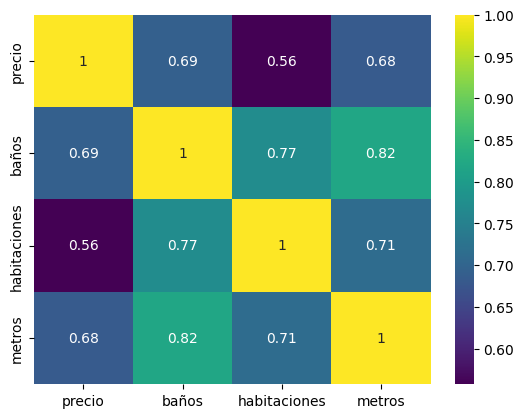

In [95]:
column_names = ["precio", "baños", "habitaciones", "metros"]
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names);

In [96]:
## Estandarización

In [97]:
print(f"Valores originales de precio")
print(f"Media : {np.mean(precio)}")
print(f"Mediana: {np.median(precio)}")
print(f"Moda: {stats.mode(precio)[0]}")
print(f"std: {np.std(precio)}") 
print("\n")
print(f"Valores originales de metros")
print(f"Media: {np.mean(m2)}")
print(f"Mediana: {np.median(m2)}")
print(f"Moda: {stats.mode(m2)[0]}")
print(f"std: {np.std(m2)}")

Valores originales de precio
Media : 1290575.262295082
Mediana: 990000.0
Moda: 850000
std: 1036073.4023886833


Valores originales de metros
Media: 217.2382513661202
Mediana: 158.0
Moda: 133
std: 191.64101817802054


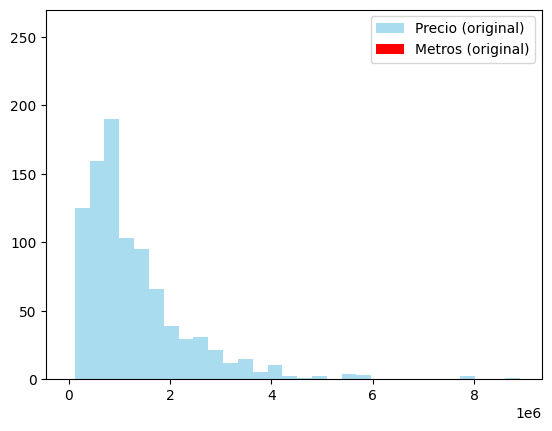

In [98]:
plt.hist(precio, bins=30, color="skyblue", alpha=0.7, label="Precio (original)")
plt.hist(m2, bins=30, color="red", label="Metros (original)")
plt.legend();

In [99]:
media_precio = np.mean(precio)
media_metros = np.mean(m2)

std_precio = np.std(precio)
std_metros = np.std(m2)

precio_estandar = (precio - media_precio) / std_precio
metros_estandar = (m2 - media_metros) / std_metros

print(precio_estandar[:5])
print(metros_estandar[:5])


[0.60750979 0.67989849 0.00909659 0.3469105  0.28972343]
[-0.17865826 -0.24649343  0.27531553  0.16051756 -0.52827026]


In [100]:
print(f"Valores estandarizados de precio")

print(f"Media precio: {np.mean(precio_estandar)}")
print(f"Mediana: {np.median(precio_estandar)}")
print(f"Moda: {stats.mode(precio_estandar)[0]}")
print(f"std: {np.std(precio_estandar)}")
print("\n")
print(f"Valores estandarizados de metros")
print(f"Media: {np.mean(metros_estandar)}")
print(f"Mediana: {np.median(metros_estandar)}")
print(f"Moda: {stats.mode(metros_estandar)[0]}")
print(f"std: {np.std(metros_estandar)}")

Valores estandarizados de precio
Media precio: -1.9413735949729513e-17
Mediana: -0.290110007265992
Moda: -0.4252355685218141
std: 0.9999999999999999


Valores estandarizados de metros
Media: 4.271021908940493e-17
Mediana: -0.30911050217387276
Moda: -0.4395627416666562
std: 1.0


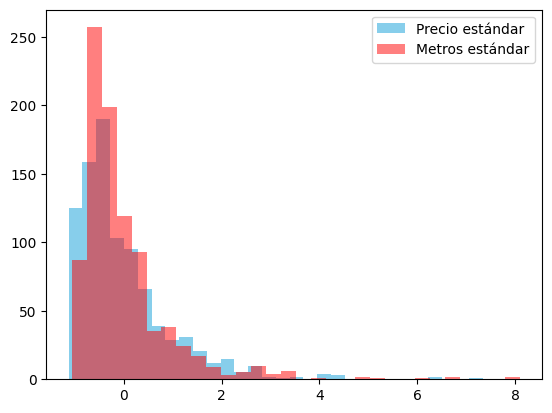

In [101]:
plt.hist(precio_estandar, bins=30, color="skyblue", label="Precio estándar")
plt.hist(metros_estandar, bins=30, color="red",  alpha=0.5, label="Metros estándar")
plt.legend();

In [102]:
## Coeficiente de asimetría
print(f"Coeficiente de asimetría precio: {stats.skew(precio)}")
print(f"Coeficiente de asimetría metros: {stats.skew(m2)}")

Coeficiente de asimetría precio: 2.299673447902698
Coeficiente de asimetría metros: 3.358506945156488


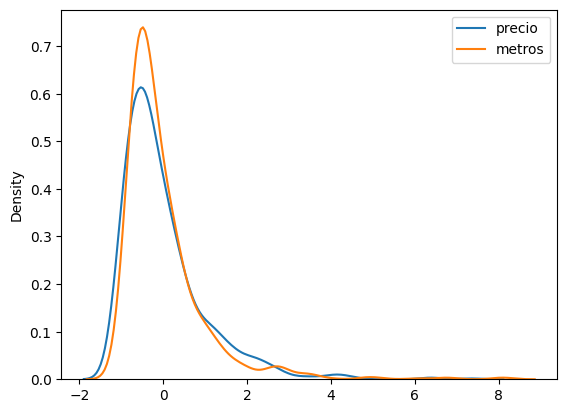

In [103]:
sns.kdeplot(precio_estandar, label="precio")
sns.kdeplot(metros_estandar, label="metros")
plt.legend();


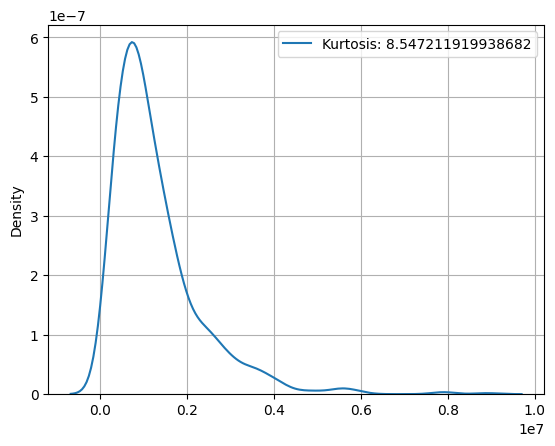

In [104]:
## Curtosis = mayor número de datos alejados de la media, valores extremos.
sns.kdeplot(x = precio, label = f"Kurtosis: {stats.kurtosis(precio)}")

plt.legend()
plt.grid()
plt.show()

In [105]:
print(f"Curtosis precio: {stats.kurtosis(precio)}")
print(f"Curtosis metros: {stats.kurtosis(m2)}")

Curtosis precio: 8.547211919938682
Curtosis metros: 17.229111152834456


Existe una fuerte asimetría en los datos, se forma cola hacia la derecha porque hay pisos con precios mucho más altos que la media y genera una diferencia importante de precios.

Con los metros cuadrados la asimetría es mayor, lo que significa que la mayoría de pisos tienen un tamaño cercano a la media o más pequeños pero hay un número inferior que tienen muchos metros cuadrados y altera la distribución, generando una gran desigualdad de tamaños.

In [106]:
## Transformar distribuciones e interpretar resultados

In [107]:
precio_sqrt = np.sqrt(precio)
metros_sqrt = np.sqrt(m2)
precio_log = np.log(precio)
metros_log = np.log(m2)

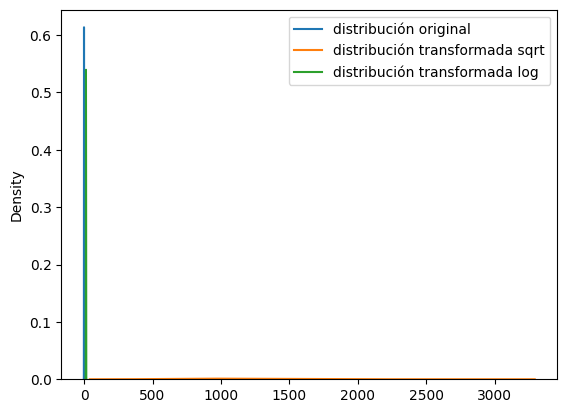

In [108]:
sns.kdeplot(precio_estandar, label="distribución original")
sns.kdeplot(precio_sqrt, label="distribución transformada sqrt")
sns.kdeplot(precio_log, label="distribución transformada log")
plt.legend();

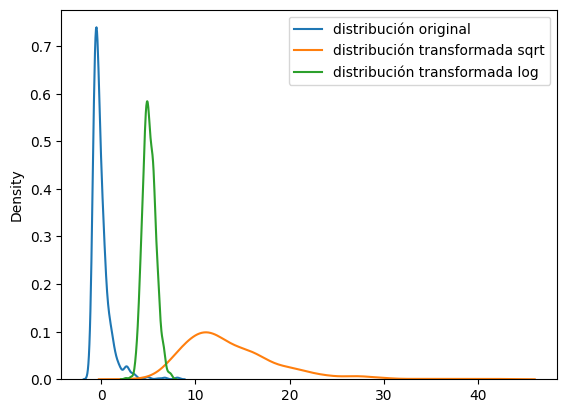

In [109]:
sns.kdeplot(metros_estandar, label="distribución original")
sns.kdeplot(metros_sqrt, label="distribución transformada sqrt")
sns.kdeplot(metros_log, label="distribución transformada log")
plt.legend();

La distribución logarítmica es la transformación más eficaz porque, como ya indicaba la curtosis, tiene una distribución muy sesgada a la derecha y ha comprimido las diferencias entre valores grandes y pequeños.

In [110]:
## Contraste de hipótesis

In [111]:
alpha = 0.05

In [112]:
# Las casas de >= 3 baños son más caras que las casas de 1-2 baños

In [113]:
_, p_precio = stats.normaltest(precio)
_, p_baños = stats.normaltest(baños)
_, p_var= stats.levene(precio, baños)
print(f"prueba precio {p_precio} y prueba baños {p_baños}")
print(f"prueba de varianza {p_var}")

prueba precio 7.178523866543975e-105 y prueba baños 5.7247702431279346e-55
prueba de varianza 1.8137994241162992e-121


In [114]:
suposiciones = p_precio > alpha and p_baños > alpha and p_var > alpha
if suposiciones:
    print("Varianzas normales y homogeneas")
else:
    print("No hay homogeneidad ni normalidad de varianzas")  

No hay homogeneidad ni normalidad de varianzas


In [115]:
Precio_menos_baños = precio[baños <= 2]
Precio_mas_baños= precio[baños >= 3]

In [116]:
# contraste de hipótesis:
stat2, pvalue2 = stats.ttest_ind(Precio_menos_baños, Precio_mas_baños)

print("Contraste de hipótesis: Pisos con >= 3 baños VS <=2 baños")
print("Estadístico:", stat2, "P-valor:", pvalue2)
if pvalue2 < alpha:
    print("Los pisos con 3 o más baños son más caros que los pisos con 2 o menos baños")
else:
    print("Los pisos con menos de 2 baños son más baratos que los pisos con 3 o más baños")

Contraste de hipótesis: Pisos con >= 3 baños VS <=2 baños
Estadístico: -21.67225872928145 P-valor: 2.342143441210671e-84
Los pisos con 3 o más baños son más caros que los pisos con 2 o menos baños


In [117]:
# Que las casas de X barrio son más baratas de las de Y barrio
# H0: Los pisos en Malasaña cuestan lo mismo que en Goya (media igual)
# H1: Los pisos en Malasaña son más caros que en Goya

In [190]:
Pisos_Malasaña = "Malasaña-Universidad"
Pisos_Goya = "Goya"

Precio_Malasaña = precio[barrio == Pisos_Malasaña]
Precio_Goya= precio[barrio == Pisos_Goya]

In [191]:
print(f"Media precio de pisos de Malasaña: {round(np.mean(Precio_Malasaña), 2)} €")
print(f"Media precio de pisos de Goya: {round(np.mean(Precio_Goya), 2)} €")

Media precio de pisos de Malasaña: 789500.0 €
Media precio de pisos de Goya: 1314772.73 €


In [187]:
stat1, pvalue1 = stats.ttest_ind(Precio_Malasaña, Precio_Goya, alternative='greater')

print("Contraste de hipótesis: Precios en", Pisos_Malasaña, "VS", Pisos_Goya)
print("Estadístico:", stat1, "P-valor:", pvalue1)
if pvalue1 < alpha:
    print("Hay evidencia de que los pisos en", Pisos_Malasaña, "son más caros que en", Pisos_Goya)
else:
    print("No hay evidencia de que los pisos en", Pisos_Malasaña, "sean más caros que en", Pisos_Goya)


Contraste de hipótesis: Precios en Malasaña-Universidad VS Goya
Estadístico: -2.8143305753123995 P-valor: 0.9963876205226003
No hay evidencia de que los pisos en Malasaña-Universidad sean más caros que en Goya
